#### Mask R-CNN - Inspect Tackcoat Trained Model

Code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [ ]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# Root directory of the project
#ROOT_DIR = "C:/Users/amd0042/Mask_RCNN"
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.balloon import balloon
%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
#IMAGE_DIR = os.path.join(ROOT_DIR, "test")
# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases
BALLON_WEIGHTS_PATH = "C:/Users/amd0042/Mask_RCNN/mask_rcnn_tackcoat_0015.h5"  # TODO: update this path


Using TensorFlow backend.


## Configurations

In [ ]:
config = balloon.BalloonConfig()
BALLOON_DIR = "C:/Users/amd0042/Mask_RCNN/samples/tackcoat"

In [ ]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.8
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

## Notebook Preferences

In [ ]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [ ]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Validation Dataset

In [ ]:
# Load validation dataset
dataset = balloon.BalloonDataset()
dataset.load_balloon("C:/Users/amd0042/Mask_RCNN/samples/tackcoat/dataset", "test")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 66
Classes: ['BG', 'tackcoat']


## Load Model

In [ ]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [ ]:
# Set path to balloon weights file

# Download file from the Releases page and set its path
# https://github.com/matterport/Mask_RCNN/releases
# weights_path = "/path/to/mask_rcnn_balloon.h5"

# Or, load the last model you trained
weights_path = "C:/Users/amd0042/Mask_RCNN/mask_rcnn_tackcoat_0015.h5"

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  C:/Users/amd0042/Mask_RCNN/mask_rcnn_tackcoat_0015.h5








## Run Detection

In [ ]:
image_id = 50 
#image_id = random.choice(dataset.image_ids) #50 #48

image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run object detection
results = model.detect([image], verbose=1)
img = image

# Display results
r = results[0]


# Compute AP over range 0.5 to 0.95 and print it
AP = utils.compute_ap_range(gt_bbox, gt_class_id, gt_mask,
                       r['rois'], r['class_ids'], r['scores'], r['masks'],
                       verbose=1)
#ARs = []
#AR, positive_ids = utils.compute_recall(r["rois"], gt_class_id, iou=2)


image ID: tackcoat.ouverture_103.jpg (50) C:/Users/amd0042/Mask_RCNN/samples/tackcoat/dataset\test\ouverture_103.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
AP @0.50:	 1.000
AP @0.55:	 1.000
AP @0.60:	 1.000
AP @0.65:	 1.000
AP @0.70:	 1.000
AP @0.75:	 1.000
AP @0.80:	 1.000
AP @0.85:	 0.000
AP @0.90:	 0.000
AP @0.95:	 0.000
AP @0.50-0.95:	 0.700


## Visualization

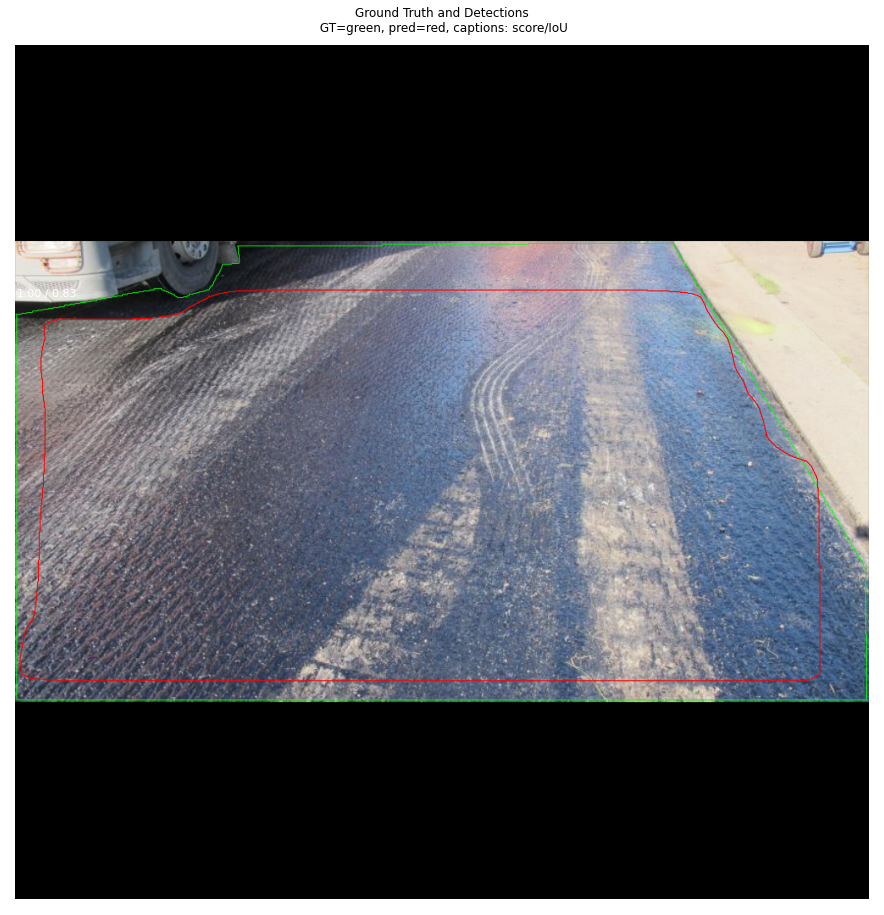

In [ ]:
visualize.display_differences(
    image,
    gt_bbox, gt_class_id, gt_mask,
    r['rois'], r['class_ids'], r['scores'], r['masks'],
    dataset.class_names,
    show_box=False, show_mask=False,
    iou_threshold=0.5, score_threshold=0.5)

In [ ]:

recall, positive_ids = utils.compute_recall(r["rois"], gt_bbox, iou=0.5)

print(recall)

1.0


In [ ]:
mask = r['masks']
mask = mask.astype(int)
mask.shape


(1024, 1024, 1)

In [ ]:

from skimage import  io, color,filters, measure
import skimage.segmentation as seg
import skimage.draw as draw
import matplotlib.pyplot as plt
from skimage.io import imsave
from skimage import filters
import skimage.segmentation as seg
import skimage.draw as draw
import matplotlib.pyplot as plt
import cv2
from skimage.transform import resize
from skimage.io import imsave
from skimage import filters
from skimage.measure import find_contours

import pandas as pd
import numpy as np
import seaborn as sns

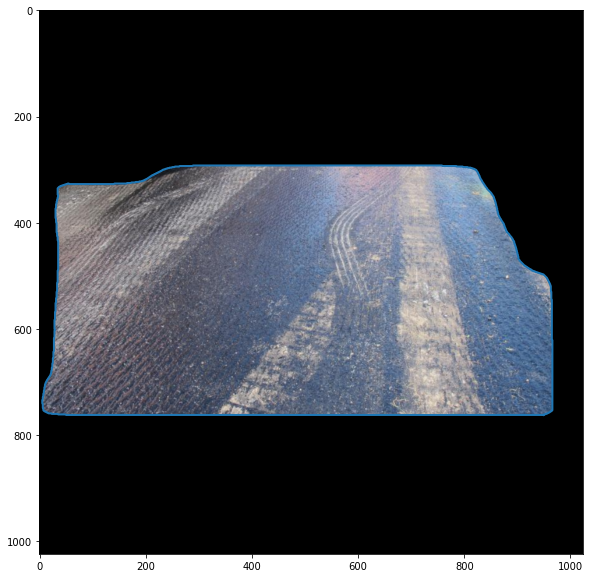

In [ ]:
for i in range(mask.shape[2]):
    temp = img#skimage.io.imread('sample.jpg')
    for j in range(temp.shape[2]):
        temp[:,:,j] = temp[:,:,j] * mask[:,:,i]

    padded_mask = np.zeros(
                        (mask.shape[0] + 2, mask.shape[1] + 2), dtype=np.uint8
                    )
    padded_mask=temp
    gray = padded_mask.sum(-1) 
    contours = find_contours(gray, 0.5)

    # Display the image and plot all contours found
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(padded_mask, cmap=plt.cm.gray)

    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    break

## GLCM for Texture Analysis on the Segmented Image

In [ ]:
import matplotlib.pyplot as plt
from skimage.measure import label # for labeling regions
from skimage.measure import regionprops # for shape analysis
import numpy as np # for matrix operations and array support
from skimage.color import label2rgb # for making overlay plots
import matplotlib.patches as mpatches # for showing rectangles and annotations
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from skimage.io import imread # for reading images
from skimage.feature import greycomatrix, greycoprops
grayco_prop_list = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']

image = temp
em_slice= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

em_thresh=imag
xx,yy = np.meshgrid(np.arange(em_slice.shape[1]),np.arange(em_slice.shape[0]))
region_labels=np.floor(xx/16)*64+np.floor(yy/16)
#plt.matshow(region_labels,cmap='rainbow')
   
        
# compute some GLCM properties each patch
from tqdm import tqdm
prop_imgs = {}
for c_prop in grayco_prop_list: #grayco_prop_list = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
    prop_imgs[c_prop] = np.zeros_like(em_slice, dtype=np.float32) #fill it with zeros
score_img = np.zeros_like(em_slice, dtype=np.float32)
out_df_list = []
for patch_idx in tqdm(np.unique(region_labels)):
    xx_box, yy_box = np.where(region_labels==patch_idx)
    
    glcm = greycomatrix(em_slice[xx_box.min():xx_box.max(), 
                                 yy_box.min():yy_box.max()],
                        [5], [0], 256, symmetric=True, normed=True)
    
    mean_score = np.mean(em_thresh[region_labels == patch_idx])
    score_img[region_labels == patch_idx] = mean_score
    
    out_row = dict(
        intensity_mean=np.mean(em_slice[region_labels == patch_idx]),
        intensity_std=np.std(em_slice[region_labels == patch_idx]),
        score=mean_score)
    
    for c_prop in grayco_prop_list:
        out_row[c_prop] = greycoprops(glcm, c_prop)[0, 0]
        prop_imgs[c_prop][region_labels == patch_idx]= out_row[c_prop]
        
    out_df_list += [out_row]


100%|██████████████████████████████████████████████████████████████████████████████| 4096/4096 [01:45<00:00, 38.80it/s]


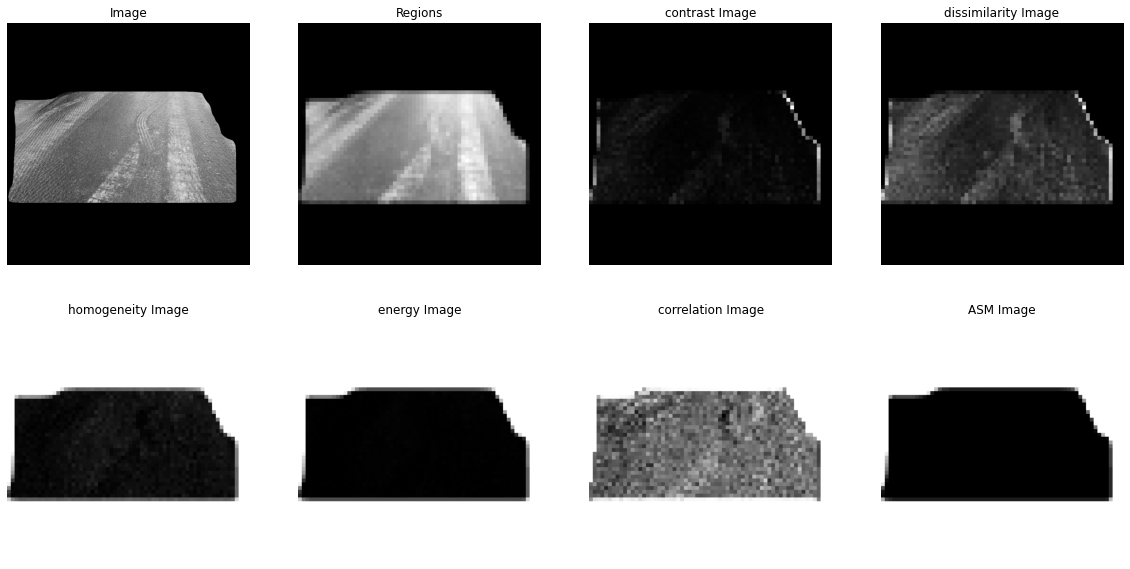

In [ ]:
# show the slice and threshold
fig, m_axs = plt.subplots(2, 4, figsize = (20, 10))
n_axs = m_axs.flatten()
ax1 = n_axs[0]
ax2 = n_axs[1]
ax1.imshow(em_slice, cmap = 'gray')
ax1.axis('off')
ax1.set_title('Image')
ax2.imshow(score_img,cmap='gray')
ax2.axis('off')
ax2.set_title('Regions')
for c_ax, c_prop in zip(n_axs[2:], grayco_prop_list):
    c_ax.imshow(prop_imgs[c_prop], cmap = 'gray')
    c_ax.axis('off')
    c_ax.set_title('{} Image'.format(c_prop))

## Visualize the DataFrame of GLCM texture properties

In [ ]:
out_df=pd.DataFrame(out_df_list)
out_df= out_df.drop(['score'], axis=1)
out_df.sample(10)

,intensity_mean,intensity_std,contrast,dissimilarity,homogeneity,energy,correlation,ASM
2241,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
2540,126.710938,16.620842,583.100000,18.113333,0.036576,0.060369,-0.053666,0.003644
3946,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
2017,120.140625,9.266653,222.340000,11.113333,0.115698,0.068313,-0.216630,0.004667
3001,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
3476,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
1967,63.535156,50.234827,284.413333,11.560000,0.363261,0.337244,0.941423,0.113733
1332,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
2750,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
3048,168.875000,17.518071,374.600000,15.093333,0.035842,0.063596,0.342833,0.004044


In [ ]:
out_df.corr()

,intensity_mean,intensity_std,contrast,dissimilarity,homogeneity,energy,correlation,ASM
intensity_mean,1.000000,0.589525,0.313669,0.763655,-0.959267,-0.960454,-0.901357,-0.955403
intensity_std,0.589525,1.000000,0.637950,0.759076,-0.631847,-0.634581,-0.523095,-0.679660
contrast,0.313669,0.637950,1.000000,0.781006,-0.369069,-0.362510,-0.440992,-0.386896
dissimilarity,0.763655,0.759076,0.781006,1.000000,-0.829853,-0.820364,-0.844820,-0.829884
homogeneity,-0.959267,-0.631847,-0.369069,-0.829853,1.000000,0.999336,0.947644,0.996001
energy,-0.960454,-0.634581,-0.362510,-0.820364,0.999336,1.000000,0.943344,0.997528
correlation,-0.901357,-0.523095,-0.440992,-0.844820,0.947644,0.943344,1.000000,0.933084
ASM,-0.955403,-0.679660,-0.386896,-0.829884,0.996001,0.997528,0.933084,1.000000


<AxesSubplot:>

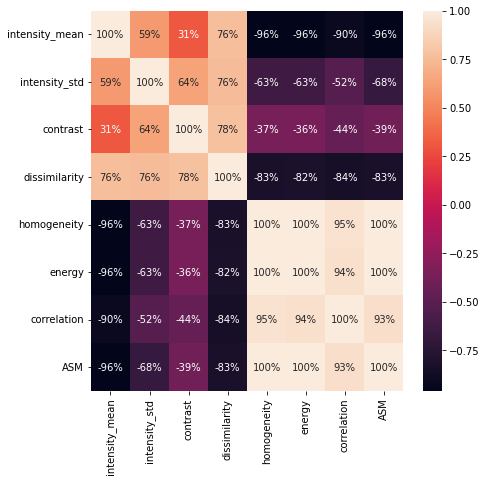

In [ ]:
plt.figure(figsize= (7,7))
sns.heatmap(out_df.corr(),annot=True,fmt='.0%')

## Normalization

In [ ]:
out_df.describe()

,intensity_mean,intensity_std,contrast,dissimilarity,homogeneity,energy,correlation,ASM
count,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000
mean,50.476048,8.081233,289.921821,7.399715,0.628164,0.627267,0.597491,0.597173
std,63.974374,13.333762,820.430313,10.529882,0.451244,0.451396,0.518944,0.484274
min,0.000000,0.000000,0.000000,0.000000,0.008451,0.057927,-0.781810,0.003356
25%,0.000000,0.000000,0.000000,0.000000,0.073123,0.064118,0.027522,0.004111
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,114.055664,13.843500,337.006667,14.130000,1.000000,1.000000,1.000000,1.000000
max,199.203125,89.793519,13561.706667,82.066667,1.000000,1.000000,1.000000,1.000000


In [ ]:
out_df.sample(10)

,intensity_mean,intensity_std,contrast,dissimilarity,homogeneity,energy,correlation,ASM
3136,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
1420,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
3193,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
2885,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
1378,98.253906,11.256334,294.706667,14.186667,0.053991,0.064464,-0.277694,0.004156
868,92.285156,14.432789,372.753333,15.473333,0.061458,0.061101,-0.082712,0.003733
2975,174.792969,11.604489,264.486667,12.553333,0.093895,0.063770,-0.012692,0.004067
86,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
1952,117.757812,9.158966,173.213333,10.733333,0.085912,0.067495,-0.090089,0.004556
1031,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Normalization (min-max normalization, value range between 0-1)
def minmax_norm(df_input):
    return (out_df - out_df.min()) / ( out_df.max() -out_df.min())

df_minmax_norm = minmax_norm(out_df)

df_minmax_norm.describe()

,intensity_mean,intensity_std,contrast,dissimilarity,homogeneity,energy,correlation,ASM
count,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000
mean,0.253390,0.089998,0.021378,0.090167,0.624994,0.604348,0.774101,0.595816
std,0.321151,0.148494,0.060496,0.128309,0.455090,0.479152,0.291245,0.485904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.065223,0.006571,0.454219,0.000758
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,0.572560,0.154170,0.024850,0.172177,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Set the Threshold condition for uniform and Non Uniform

In [ ]:
df_minmax_norm['Tack coat coverage percentage'] = df_minmax_norm.apply(lambda x:'Uniform'\
                                                   if (x['homogeneity']>0.3 and x['correlation']>0.2 and x['energy']>0.4) \
                                                    else 'Non-uniform',axis = 1)
df_minmax_norm.sample(10)


,intensity_mean,intensity_std,contrast,dissimilarity,homogeneity,energy,correlation,ASM,Tack coat coverage percentage
4019,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,Uniform
2201,0.751471,0.242870,0.097453,0.369537,0.013586,0.001608,0.288919,0.000178,Non-uniform
4052,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,Uniform
2840,0.890560,0.134708,0.011466,0.124777,0.066773,0.006755,0.725537,0.000780,Non-uniform
111,0.202212,0.504018,0.061533,0.185865,0.510551,0.450061,0.883421,0.229660,Uniform
1617,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,Uniform
4087,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,Uniform
2952,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,Uniform
3642,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,Uniform
758,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,Uniform


## Percentage calculation

Uniform        59.790039
Non-uniform    40.209961
Name: Tack coat coverage percentage, dtype: float64

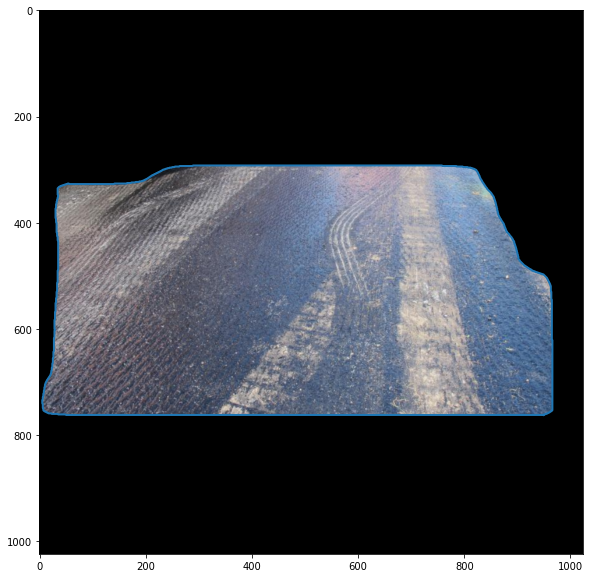

In [ ]:
df_percent = df_minmax_norm['Tack coat coverage percentage'].value_counts(normalize=True)*100

for segimage in padded_mask:

    padded_mask=temp
    gray = padded_mask.sum(-1) 
    contours = find_contours(gray, 0.5)

    # Display the image and plot all contours found
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(padded_mask, cmap=plt.cm.gray)

    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    break
df_percent